# Trabajo Práctico 2: Análisis con Baseline - Organización de Datos

**Alumnos y Padrón**
+ Craviotto Roitbarg, Mateo Exequiel - 106255 
+ Gómez, Joaquín - 103735

https://github.com/joaqogomez/Organizacion-de-datos-fiuba

Realizamos un análisis del baseline del trabajo práctico 1 para comparar las métricas con las del resto de los modelos presentados en este trabajo práctico.

## Configuraciones Iniciales
Primero, importamos las bibliotecas que vamos a utilizar:

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [3]:
from preprocessing import dividir_dataset
from preprocessing import preparar_dataset
from funciones_auxiliares import graficar_auc_roc
from funciones_auxiliares import traer_df
from funciones_auxiliares import graficar_matriz_confusion

## Baseline
A continuación, definimos el baseline utilizado en el trabajo práctico anterior:

In [4]:
def baseline(df: pd.DataFrame):
  
    gano_mas_de_5000_en_bolsa = df['ganancia_perdida_declarada_bolsa_argentina'] > 5000
    estudio_mas_de_14_anios = df['anios_estudiados'] > 14
    tiene_matrimonio = (df['estado_marital'] == 'matrimonio_civil') | (df['estado_marital'] == 'matrimonio_militar')
    tiene_mas_de_30_anios = df['edad'] > 30
    
    df['prediccion_alto_valor_adquisitivo'] = 0
    df.loc[gano_mas_de_5000_en_bolsa,'prediccion_alto_valor_adquisitivo'] = 1 
    df.loc[estudio_mas_de_14_anios & tiene_matrimonio & tiene_mas_de_30_anios ,'prediccion_alto_valor_adquisitivo'] =  1 
    
    resultado = df['prediccion_alto_valor_adquisitivo'].values.tolist()
    df.drop(columns=['prediccion_alto_valor_adquisitivo'],inplace=True)    
    return resultado

## Carga del set de datos
Cargamos el dataset y aplicamos las funciones necesarias para adecuarlo al modelo. También segmentamos el dataset en X e y (target):

In [5]:
df = traer_df()
df = preparar_dataset(df)

In [6]:
X, y = dividir_dataset(df)

## Predicción con el dataset original

Hacemos que el baseline prediga sobre el dataset original entero.

Ploteamos el gráfico de la curva ROC, con su respectivo score en la métrica AUC-ROC. Es importante destacar que en este caso estamos analizando la métrica con las predicciones y no con las probabilidades de pertenencia a cada clase (predict_proba), como en el resto de los modelos. Eso puede influir en los resultados.

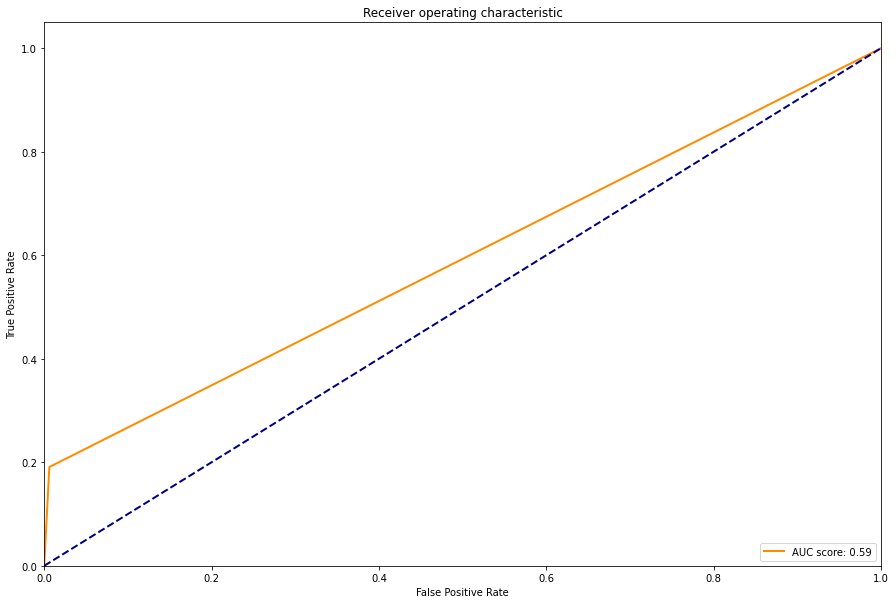

El valor de la metrica AUC-ROC para este modelo es: 0.592321561751791


In [7]:
y_pred = baseline(X)
graficar_auc_roc(y, y_pred)

Se obtuvo un valor bastante bajo, pero hay que tener en cuenta que no se está utilizando "predict_proba", como mencionamos previamente.

A continuación, mostramos el classification report correspondiente:

In [8]:
print(classification_report(y, y_pred, target_names=['No Tiene Alto Valor Adquisitivo', 'Tiene Alto Valor Adquisitivo'], digits = 3))

                                 precision    recall  f1-score   support

No Tiene Alto Valor Adquisitivo      0.795     0.994     0.883     24720
   Tiene Alto Valor Adquisitivo      0.908     0.191     0.315      7841

                       accuracy                          0.800     32561
                      macro avg      0.851     0.592     0.599     32561
                   weighted avg      0.822     0.800     0.746     32561



Además, mostramos la matriz de confusión:

In [9]:
from funciones_auxiliares import graficar_matriz_confusion

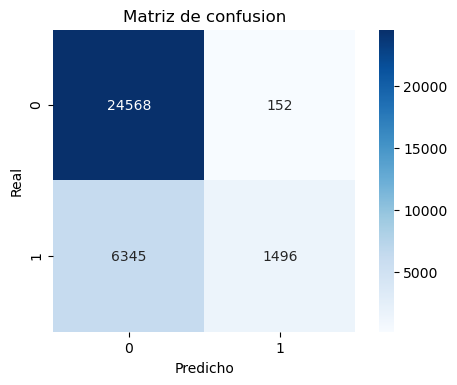

In [10]:
graficar_matriz_confusion(y, y_pred)

Se puede observar una clara tendencia del baseline a predecir la mayoría de las instancias como instancias de bajo valor adquisitivo (ceros). Esto se puede ver en el altísimo recall de esas instancias (0.994), y el muy bajo recall de las instancias con alto valor adquisitivo (0.191).